In [1]:
import cv2
img_file = 'opencv/likelion.png'
img = cv2.imread(img_file)
if img is not None:
    cv2.imshow('IMG',img)
    cv2.waitKey(100)
    cv2.destroyAllWindows()
else:
    print("NO IMAGE FILE.")

In [2]:
import cv2
img_file = 'opencv/likelion.png'
save_file = 'opencv/likelion_GRAY.png'
img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)

# 이미지 파일 보여주기
cv2.imshow(img_file, img)
# 파일로 저장, 포맷은 확장자에 따름
cv2.imwrite(save_file, img)
cv2.waitKey(100)
cv2.destroyAllWindows()

In [3]:
import cv2
video_file = "opencv/likelion_video.mp4" # 동영상 파일 경로
cap = cv2.VideoCapture(video_file)  # 동영상 캡처 객체 생성

# 캡처 객체 초기화 확인
if cap.isOpened():
    while True:
        # 다음 프레임 읽기
        ret, img = cap.read()
        # 프레임 읽기 정상인 경우
        if ret:
            # 화면에 출력
            cv2.imshow(video_file, img) # 화면에 표시
            cv2.waitKey(25)
        # 프레임 읽기가 정상이 아닌 경우
        else:
            break
else:
    print("can't open video.")
# 캡처 자원 반납
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
cap = cv2.VideoCapture(0)
if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            cv2.imshow('camera', img)
            if cv2.waitKey(1) != -1:
                break
        else:
            print("no frame")
            break
else:
    print("can't open camera")
cap.release()
cv2.destroyAllWindows()

In [3]:
import cv2
video_file = "opencv/likelion_video.mp4"
cap = cv2.VideoCapture(video_file)

if cap.isOpened():
    fps = cap.get(cv2.CAP_PROP_FPS)
    delay = int(1000/fps)
    print("FPS : %f, Delay : %dms" %(fps, delay))
    while True:
        ret, img = cap.read()
        if ret:
            cv2.imshow(video_file, img)
            cv2.waitKey(delay)
        else:
            break
else:
    print("can't open video.")
cap.release()
cv2.destroyAllWindows()

FPS : 30.000000, Delay : 33ms


In [1]:
import cv2
cap = cv2.VideoCapture(0)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
print("Original width : %d, height : %d" % (width, height))
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
print("Resize width : %d, height : %d" % (width, height))

if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            cv2.imshow('camera', img)
            if cv2.waitKey(1) != -1:
                break
            else:
                print("no frame!")
                break
else:
    print("can't open camere!")
cap.release()
cv2.destroyAllWindows()

Original width : 1280, height : 720
Resize width : 320, height : 240
no frame!


In [ ]:
import cv2
img = cv2.imread('opencv/likelion.png')
x,y,w,h = cv2.selectROI('img', img, True)
if w and h:
    roi = img[y:y+h, x:x+w]
    cv2.imshow('cropped', roi) # ROI 지정 영역을 새 창으로 표시
    # cv2.moveWindow('cropped', 0, 0) # 새 창을 화면 좌측 상단으로 이동
    # ROI 영역만 파일로 저장
    cv2.imwrite('opencv/copy.png',roi)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(x,y,w,h)

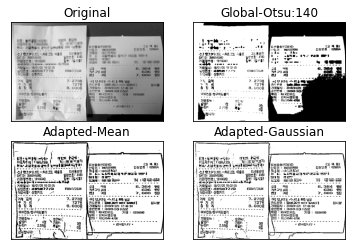

In [1]:
import cv2
import matplotlib.pyplot as plt
blk_size = 9 # 블럭 사이즈
C = 5 # 차감 상수
img = cv2.imread('opencv/receipt.png', cv2.IMREAD_GRAYSCALE) # 그레이 스케일로 읽기
# 오츠의 알고리즘으로 단일 경계 값을 전체이미지에 적용
ret, th1 = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 적응형 스레시홀드를 평균과 가우시안 분포로 각각 적용
th2 = cv2.adaptiveThreshold(img, # 입력 영상
                            255, # 경곗값을 만족하는 픽셀에 적용할 값
                            cv2.ADAPTIVE_THRESH_MEAN_C,# 스레시홀드 적용 방법 지정(이웃 픽셀의 평균으로 결정)
                            cv2.THRESH_BINARY, # 이진 분류
                            blk_size, C) # 영역으로 나눌 이웃의 크기, 계산된 경계 값 결과에서 가감할 상수
th3 = cv2.adaptiveThreshold(img,
                            255,
                            cv2.ADAPTIVE_THRESH_GAUSSIAN_C, # 가우시안 분포에 따른 가중치의 합으로 결정
                            cv2.THRESH_BINARY,
                            blk_size, C)

imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1,'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])
plt.show()

In [1]:
# 차 영상 Image Differencing
import cv2
# 연산에 필요한 영상을 읽고 그레이스케일로 변환
img1 = cv2.imread('opencv/floor_plan_A.jpg')
img2 = cv2.imread('opencv/floor_plan_B.jpg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 1번. 두 영상의 절대값 차 연산
diff = cv2.absdiff(img1_gray, img2_gray)
# 차 영상을 극대화 하기 위해 스레시홀드 처리 및 컬러로 변환
# 차이를 극대화 하기위해 1보다 큰 값은 모두 255로 바꿈
_, diff = cv2.threshold(diff, 1, 255, cv2.THRESH_BINARY)

# 2번. 색상을 표현하기 위해 컬러 스케일로 전환
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
# 차이가 발생한 부분에 대하여 붉은 색으로 전환
diff_red[:,:,2] = 0

# 두 번째 이미지에 변화 부분 표시 (차이 표시)
spot = cv2.bitwise_xor(img2, diff_red)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('diff', diff)
cv2.imshow('spot', spot)
cv2.waitKey()
cv2.destroyAllWindows()